## Proyecto Series Temporales
### Grupo 8 - Walmart Sales
#### Integrantes:

- Diego Collado
- Iñigo Gonzalez-Varas
- Carlota Lopez
- Diego Lopez



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import seaborn as sns
from scipy import stats

warnings.filterwarnings('ignore')

In [122]:
train_set = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
features = pd.read_csv('features.csv')

Train Set: 5 columnas
- Store: número de tienda
- Dept: número de departamento
- Date: fecha de inicio de la semana
- Weekly_Sales: ventas semanales (date->date+7)
- IsHoliday: si la semana contiene un dia festivo

In [123]:
train_set.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [124]:
stores.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [125]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [126]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [127]:
df = train_set.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [128]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column

vamos a ver el numero de ventas semanales de cada tienda dividido por el numero de ventas de cada dept

In [129]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table.head(10))

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


viendo la grafica podemos ver que hay valores negativos nan etc asi que habra que eliminarlos si no suponen un cambio de datos muy grande

In [130]:
df.loc[df['Weekly_Sales']<=0]


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


1358 rows in 421570 rows means 0.3%, so I can delete and ignore these rows which contains wrong sales values.

In [131]:
df = df.loc[df['Weekly_Sales'] > 0]
df = df.loc[df['Store']<10]


In [132]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87519,9,91,2012-10-26,914.84,False,69.52,3.506,512.23,3.0,8.0,NaN,1666.38,227.232807,4.954,B,125833
87520,9,92,2012-10-26,18310.28,False,69.52,3.506,512.23,3.0,8.0,NaN,1666.38,227.232807,4.954,B,125833
87521,9,94,2012-10-26,233.02,False,69.52,3.506,512.23,3.0,8.0,NaN,1666.38,227.232807,4.954,B,125833
87522,9,95,2012-10-26,32382.05,False,69.52,3.506,512.23,3.0,8.0,NaN,1666.38,227.232807,4.954,B,125833


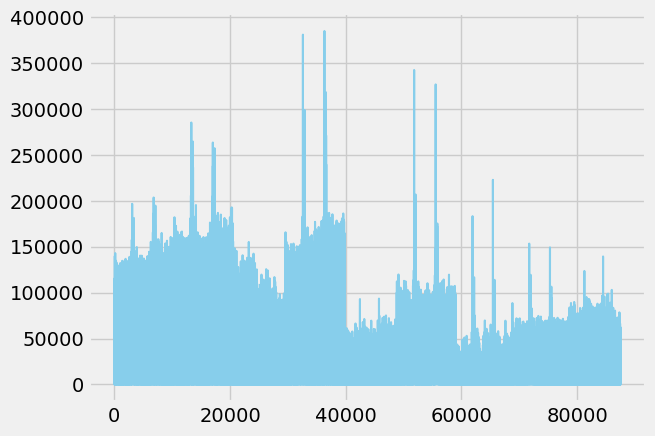

In [133]:
plt.plot(df['Weekly_Sales'], color="skyblue")

vamos a ver si hay valores nulos

In [134]:
df['Weekly_Sales'].isna().sum()

0

In [135]:
df['Weekly_Sales'].describe()

count     87355.000000
mean      16181.145856
std       24143.062457
min           0.010000
25%        2212.925000
50%        7066.760000
75%       19408.545000
max      385051.040000
Name: Weekly_Sales, dtype: float64

vamos a ver si el numero de ventas aumenta cuando es vacaciones

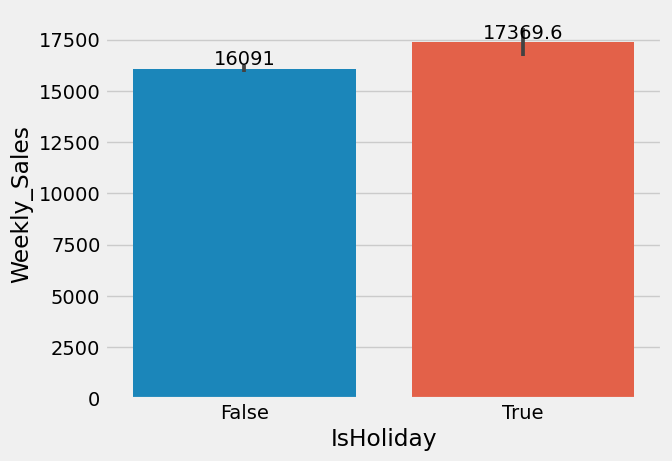

In [136]:
ax = sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
for i in ax.containers:
    ax.bar_label(i,)


deberiamos: hacer el decomp de la primera practica
hacer unos lag como en la segunda
sacarnos las correlaciones

In [137]:
# Crear los lags de ventas
lags = 20  # Número de lags
for i in range(1, lags + 1):
    df[f"lag_{i}"] = df["Weekly_Sales"].shift(i)

# Eliminar filas con valores faltantes en las nuevas columnas de lag
df.dropna(subset=[f"lag_{i}" for i in range(1, lags + 1)], inplace=True)


In [138]:
X = df[[f"lag_{i}" for i in range(1, lags + 1)]]
y = df["Weekly_Sales"]
X

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20
20,8907.63,5034.10,1947.05,4729.50,13223.76,10217.55,19466.91,41969.29,8449.54,24213.18,30721.50,16930.99,40129.01,21084.08,5749.03,32229.38,39954.04,13740.12,50605.27,24924.50
21,13623.98,8907.63,5034.10,1947.05,4729.50,13223.76,10217.55,19466.91,41969.29,8449.54,24213.18,30721.50,16930.99,40129.01,21084.08,5749.03,32229.38,39954.04,13740.12,50605.27
22,24146.49,13623.98,8907.63,5034.10,1947.05,4729.50,13223.76,10217.55,19466.91,41969.29,8449.54,24213.18,30721.50,16930.99,40129.01,21084.08,5749.03,32229.38,39954.04,13740.12
23,8272.90,24146.49,13623.98,8907.63,5034.10,1947.05,4729.50,13223.76,10217.55,19466.91,41969.29,8449.54,24213.18,30721.50,16930.99,40129.01,21084.08,5749.03,32229.38,39954.04
24,11609.50,8272.90,24146.49,13623.98,8907.63,5034.10,1947.05,4729.50,13223.76,10217.55,19466.91,41969.29,8449.54,24213.18,30721.50,16930.99,40129.01,21084.08,5749.03,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87519,3096.77,12359.73,593.69,10562.22,2592.77,12637.94,6826.07,30555.00,1274.55,4032.72,108.00,15.00,830.57,7751.17,1802.55,35.00,654.00,6753.66,4744.86,3469.16
87520,914.84,3096.77,12359.73,593.69,10562.22,2592.77,12637.94,6826.07,30555.00,1274.55,4032.72,108.00,15.00,830.57,7751.17,1802.55,35.00,654.00,6753.66,4744.86
87521,18310.28,914.84,3096.77,12359.73,593.69,10562.22,2592.77,12637.94,6826.07,30555.00,1274.55,4032.72,108.00,15.00,830.57,7751.17,1802.55,35.00,654.00,6753.66
87522,233.02,18310.28,914.84,3096.77,12359.73,593.69,10562.22,2592.77,12637.94,6826.07,30555.00,1274.55,4032.72,108.00,15.00,830.57,7751.17,1802.55,35.00,654.00


In [142]:
# Dividir los datos en conjuntos de entrenamiento y prueba
Xaux = X[80000:80500]
yaux = y[80000:80500]
Xaux.shape


(500, 20)

In [146]:
plt.rcParams['agg.path.chunksize'] = 200
# Crear y entrenar el modelo de árbol de decisión
modelo_arbol = DecisionTreeRegressor(max_depth=5)  # Puedes ajustar la profundidad máxima según tus necesidades
modelo_arbol.fit(X, y)
predicciones = modelo_arbol.predict(Xaux)

In [147]:
predicciones.shape

(500,)

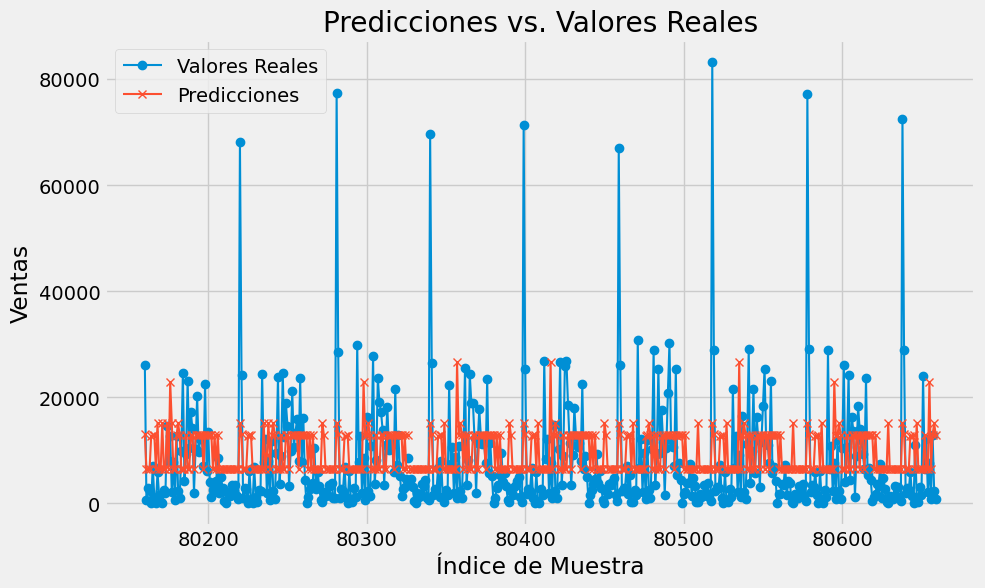

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(yaux.index,yaux, label='Valores Reales', marker='o')
plt.plot(yaux.index,predicciones, label='Predicciones', marker='x')
plt.xlabel('Índice de Muestra')
plt.ylabel('Ventas')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.show()

In [150]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

dfaux = X.join(y)
dfaux


,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,Weekly_Sales
20,8907.63,5034.10,1947.05,4729.50,13223.76,10217.55,19466.91,41969.29,8449.54,24213.18,...,16930.99,40129.01,21084.08,5749.03,32229.38,39954.04,13740.12,50605.27,24924.50,13623.98
21,13623.98,8907.63,5034.10,1947.05,4729.50,13223.76,10217.55,19466.91,41969.29,8449.54,...,30721.50,16930.99,40129.01,21084.08,5749.03,32229.38,39954.04,13740.12,50605.27,24146.49
22,24146.49,13623.98,8907.63,5034.10,1947.05,4729.50,13223.76,10217.55,19466.91,41969.29,...,24213.18,30721.50,16930.99,40129.01,21084.08,5749.03,32229.38,39954.04,13740.12,8272.90
23,8272.90,24146.49,13623.98,8907.63,5034.10,1947.05,4729.50,13223.76,10217.55,19466.91,...,8449.54,24213.18,30721.50,16930.99,40129.01,21084.08,5749.03,32229.38,39954.04,11609.50
24,11609.50,8272.90,24146.49,13623.98,8907.63,5034.10,1947.05,4729.50,13223.76,10217.55,...,41969.29,8449.54,24213.18,30721.50,16930.99,40129.01,21084.08,5749.03,32229.38,11737.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87519,3096.77,12359.73,593.69,10562.22,2592.77,12637.94,6826.07,30555.00,1274.55,4032.72,...,15.00,830.57,7751.17,1802.55,35.00,654.00,6753.66,4744.86,3469.16,914.84
87520,914.84,3096.77,12359.73,593.69,10562.22,2592.77,12637.94,6826.07,30555.00,1274.55,...,108.00,15.00,830.57,7751.17,1802.55,35.00,654.00,6753.66,4744.86,18310.28
87521,18310.28,914.84,3096.77,12359.73,593.69,10562.22,2592.77,12637.94,6826.07,30555.00,...,4032.72,108.00,15.00,830.57,7751.17,1802.55,35.00,654.00,6753.66,233.02
87522,233.02,18310.28,914.84,3096.77,12359.73,593.69,10562.22,2592.77,12637.94,6826.07,...,1274.55,4032.72,108.00,15.00,830.57,7751.17,1802.55,35.00,654.00,32382.05


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

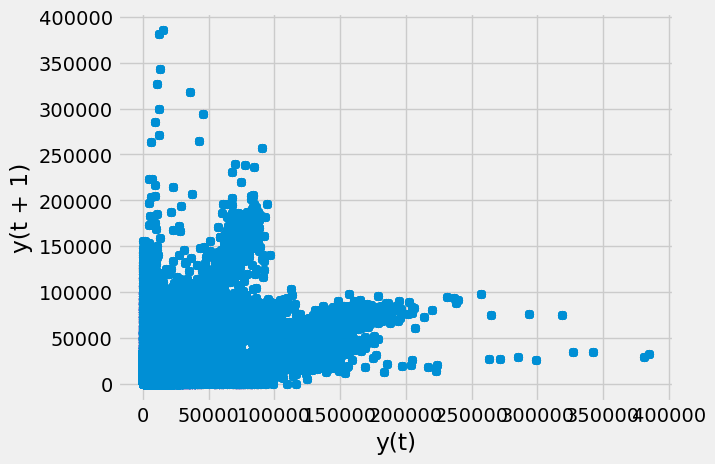

In [151]:
lag_plot(dfaux)

In [52]:
dfprim=df[["Date","Weekly_Sales"]]



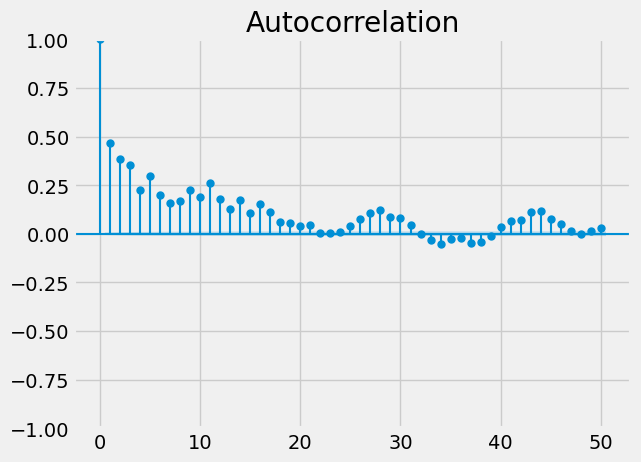

In [152]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Weekly_Sales"]);

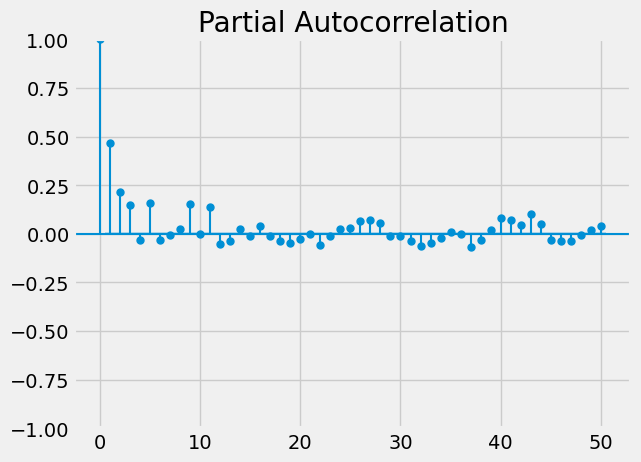

In [153]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Weekly_Sales"]);

In [154]:
df2 = df[['Date','Fuel_Price','Dept','Type','IsHoliday','Weekly_Sales']]
df2 = df2.rename(columns={'Weekly_Sales': 'y'})


In [56]:
!pip install skforecast

  Obtaining dependency information for skforecast from https://files.pythonhosted.org/packages/7f/87/da64dcc2afed93fd2f922fafd65712685861d2d65d9753bfc6e7fbbb95d0/skforecast-0.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for optuna<3.3,>=2.10.0 from https://files.pythonhosted.org/packages/a0/8c/f72c6bc61b3c71149af95cd91e16149ea5b5aeae99e6d197f80e79a1035a/optuna-3.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/a2/8b/46919127496036c8e990b2b236454a0d8655fd46e1df2fd35610a9cbc842/alembic-1.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for cmaes>=0.9.1 from https://files.pythonhosted.org/packages/f7/46/7d9544d453346f6c0c405916c95fdb653491ea2e9976cabb810ba2fe8cd4/cmaes-0.10.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/78.7 kB ? eta -:--:--
     ---------------------------------------- 78.7/78.7 kB 4.3 MB/s eta 0:00:00
   -------------------

In [57]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [155]:
print(f'Número de filas con missing values: {df2.isnull().any(axis=1).mean()}')

Número de filas con missing values: 0.0


In [158]:
steps = 3600
datos_train = df2[:-steps]
datos_test  = df2[-steps:]

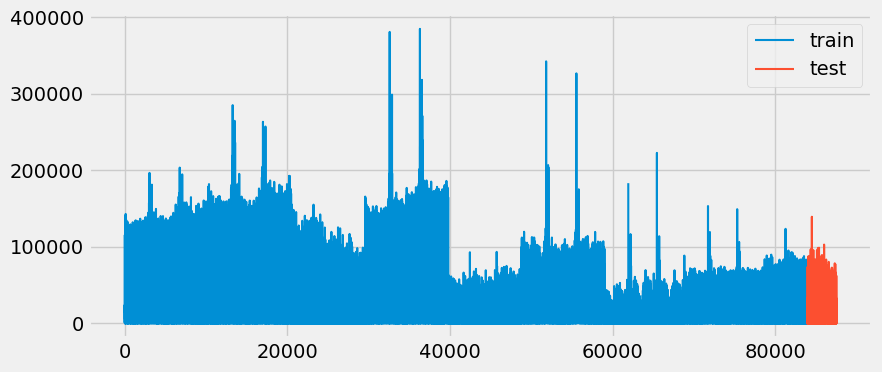

In [159]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
ax.legend();

In [160]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=datos_train['y']) # cambiar el nombre de la variable objetivo
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 83734] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-10-02 12:56:17 
Last fit date: 2023-10-02 12:57:56 
Skforecast version: 0.10.1 
Python version: 3.8.18 
Forecaster id: None 

In [161]:
# Generación de Predicciones
# ==============================================================================

predicciones = forecaster.predict(steps=3600)


In [162]:
pred = pd.DataFrame(predicciones)

In [163]:
pred = pred.set_index(datos_test.index)
pred.head(5)

,pred
83907,6127.3800
83908,6511.6027
83909,5217.9380
83910,2857.4885
83911,4611.4072


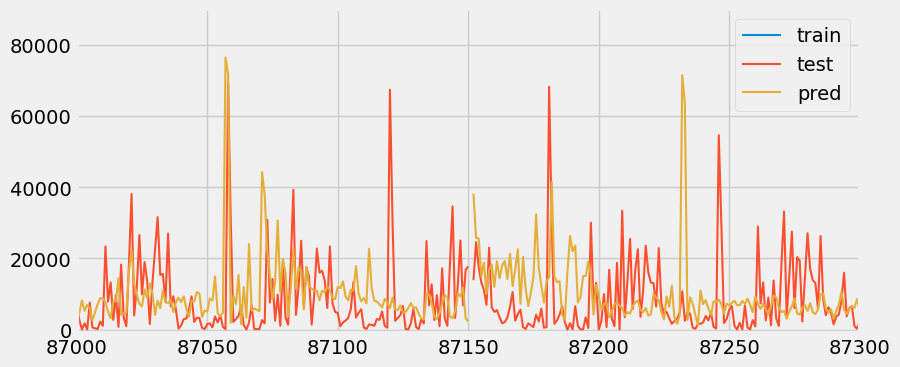

In [191]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
pred.plot(ax=ax, label='predicciones')
plt.xlim(87000,87300)
plt.ylim(-1000,90000)
ax.legend();

In [193]:
# Error de test
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test['y'],
                y_pred = predicciones
            )

print(f"Error de test (mse) {error_mse}")

Error de test (mse) 262747965.74363947


In [202]:
steps = 3600
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # Este valor será remplazado en el grid search
             )

# Lags utilizados como predictores
lags_grid = [50]

# Hiperparámetros del regresor
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

param_grid = {'n_estimators': [500, 1000],
              'max_depth': [ 5, 10]}

resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                   )

Number of models compared: 2.


lags grid:   0%|          | 0/1 [00:00<?, ?it/s]

params grid:   0%|          | 0/2 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [195]:
# Resultados Grid Search
# ==============================================================================
resultados_grid

,lags,params,mean_squared_error,max_depth,n_estimators
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",8.423426e+08,3,100
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",9.003261e+08,5,100


In [196]:
# Crear y entrenar forecaster con mejores hiperparámetros
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=datos_train['y'])

In [197]:
# Predicciones
# ==============================================================================
predicciones = forecaster.predict(steps=steps)

In [199]:
predicciones = pd.DataFrame(predicciones)
predicciones = predicciones.set_index(datos_test.index)

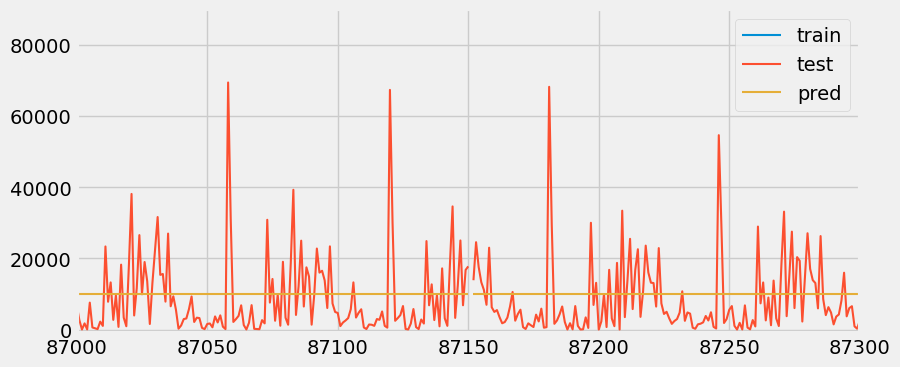

In [201]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
plt.xlim(87000,87300)
plt.ylim(-1000,90000)
ax.legend();